In [1]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd
import sqlalchemy as sqla
import geopandas as gpd
from shapely.geometry import Point, Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
with sqlite3.connect("mydata.sqlite") as con:
    cursor = con.cursor()

In [2]:
# Code on creating the tables out of the data from milestones 2-4

# Grades Table from Milestone 2
#df.to_sql('grades', con = con, index = False)
# con.commit()

# Grades Table from Milestone 3
#df.to_sql('regions', con = con, index = False)
# con.commit()

# Counties Table from Milestone 4
#df.to_sql('counties', con = con, index = False)
# con.commit()

In [3]:
select_grades_table = con.execute('select * from grades')
grades_rows = select_grades_table.fetchall()
grades_df = pd.DataFrame(grades_rows, columns = [x[0] for x in select_grades_table.description])
grades_df

,School Name,School_Code,Grade_Span,Title I Served School,School Performance Grade (SPG),School Performance Score (SPS),School Achievement Score (SA),School Growth Score (SG)
0,ABSS Early College at ACC,010303,09-13,N,A,88.0,90.4,80.3
1,Alexander Wilson Elementary,010304,PK-05,N,C,63.0,59.7,76.6
2,Altamahaw-Ossipee Elementary,010308,PK-05,N,C,67.0,62.5,84.0
3,Broadview Middle,010310,06-08,Y,F,34.0,28.9,55.7
4,Highland Elementary,010312,PK-05,N,B,70.0,69.3,73.1
...,...,...,...,...,...,...,...,...
2538,Dillard Academy,96C000,PK-05,Y,D,47.0,37.5,84.8
2539,Wayne Preparatory Academy,96F000,PK-05,Y,C,55.0,51.1,70.0
2540,Bridges Academy,97D000,0K-09,Y,D,50.0,41.4,82.5
2541,Sallie B Howard School,98A000,PK-05,Y,B,72.0,67.7,90.9


In [4]:
select_regions_table = con.execute('select * from regions')
regions_rows = select_regions_table.fetchall()
regions_df = pd.DataFrame(regions_rows, columns = [x[0] for x in select_regions_table.description])
regions_df

,Region,County
0,Northeast Region,Beaufort
1,Southeast Region,Brunswick
2,North Central Region,Chapel Hill-Carrboro
3,Sandhills Region,Bladen
4,Piedmont - Triad Region,Alamance
...,...,...
110,North Central Region,Wilson
111,Piedmont - Triad Region,Yadkin
112,Northeast Region,Tyrrell
113,Northeast Region,Washington


In [5]:
select_counties_table = con.execute('select * from counties')
counties_rows = select_counties_table.fetchall()
counties_df = pd.DataFrame(counties_rows, columns = [x[0] for x in select_counties_table.description])
counties_df

,OBJECTID,LEA_SCHOOL,SCHOOL_NAM,PHYS_ADDR,PHYS_CITY,PHYS_ZIP,PHONE,URL_ADDRES,COUNTY,ACCR_STAT,SCH_DESG,SCH_TYPE,SCH_PTYPE,SCH_CTYPE
0,1,070310,B C Ed Tech Center,820 North Bridge St,Washington,27899,2529465382,http://beaufort.etc.schoolfusion.us/,Beaufort,None,Public,Alternative Education,Cooperative Innovative HS,Traditional
1,2,070340,S W Snowden Elementary,693 North 7th Street,Aurora,27806,2523225351,http://beaufort.sws.schoolfusion.us/,Beaufort,SA,Public,Regular School,None,Traditional
2,3,070326,Chocowinity Primary,606 Gray Road,Chocowinity,27817,2529463881,http://beaufort.cps.schoolfusion.us/,Beaufort,SA,Public,Regular School,None,Traditional
3,4,070308,Bath Elementary,110 S King Street,Bath,27808,2529233251,http://beaufort.bath.schoolfusion.us/,Beaufort,SA,Public,Regular School,None,Traditional
4,5,740309,AydenGrifton High,7653 NC 11 South,Ayden,28513,2527464183,http://www.pitt.k12.nc.us,Pitt,SA,Public,Regular School,None,Traditional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,2590,260419,Reid Ross Classical Middle,3200 Ramsey Street,Fayetteville,28301,Unknown,None,Cumberland,None,Public,Regular School,None,None
2589,2591,260417,New Century International Middle,7455 Century Circle,Fayetteville,28306,Unknown,None,Cumberland,None,Public,Regular School,None,None
2590,2592,650409,D.C. Virgo Preparatory Academy,813 Nixon Street,Wilmington,28401,9102516150,http://www.nhcs.net/virgo/,New Hanover,None,Public,Regular School,None,Traditional
2591,2593,400318,Greene County Intermediate,614 Middle School Road,Snow Hill,28580,252747182,http://gcis.gcsedu.org,Greene,None,Public,Regular School,None,Traditional


In [6]:
select_multiple_tables = con.execute("select grades.*, counties.COUNTY FROM grades LEFT JOIN counties on grades.School_Code = counties.LEA_SCHOOL")
multiple_rows = select_multiple_tables.fetchall()
grades_counties_df = pd.DataFrame(multiple_rows, columns = [x[0] for x in select_multiple_tables.description])
grades_counties_df

,School Name,School_Code,Grade_Span,Title I Served School,School Performance Grade (SPG),School Performance Score (SPS),School Achievement Score (SA),School Growth Score (SG),COUNTY
0,ABSS Early College at ACC,010303,09-13,N,A,88.0,90.4,80.3,Alamance
1,Alexander Wilson Elementary,010304,PK-05,N,C,63.0,59.7,76.6,Alamance
2,Altamahaw-Ossipee Elementary,010308,PK-05,N,C,67.0,62.5,84.0,Alamance
3,Broadview Middle,010310,06-08,Y,F,34.0,28.9,55.7,Alamance
4,Highland Elementary,010312,PK-05,N,B,70.0,69.3,73.1,Alamance
...,...,...,...,...,...,...,...,...,...
2538,Dillard Academy,96C000,PK-05,Y,D,47.0,37.5,84.8,Wayne
2539,Wayne Preparatory Academy,96F000,PK-05,Y,C,55.0,51.1,70.0,None
2540,Bridges Academy,97D000,0K-09,Y,D,50.0,41.4,82.5,Wilkes
2541,Sallie B Howard School,98A000,PK-05,Y,B,72.0,67.7,90.9,Wilson


In [7]:
grades_counties_df.isna().sum()

School Name                          0
School_Code                          0
Grade_Span                           0
Title I Served School                0
School Performance  Grade (SPG)      0
School Performance Score (SPS)       0
School Achievement Score (SA)       39
School Growth Score (SG)            55
COUNTY                             185
dtype: int64

In [8]:
df_na = grades_counties_df[grades_counties_df['COUNTY'].isnull()]
df_na

,School Name,School_Code,Grade_Span,Title I Served School,School Performance Grade (SPG),School Performance Score (SPS),School Achievement Score (SA),School Growth Score (SG),COUNTY
35,Alexander Early College,020303,09-11,N,A,87.0,87.2,84.5,None
59,Ashe County Early College High,050303,09-10,N,A,88.0,95.0,61.7,None
106,Bladen Early College,090376,09-10,N,C,58.0,54.5,71.2,None
160,Enka Intermediate,110425,05-06,Y,C,64.0,61.1,73.6,None
167,Nesbitt Discovery Academy,110500,09-12,N,A,99.0,99.7,93.7,None
...,...,...,...,...,...,...,...,...,...
2534,Pine Springs Prep Academy,93N000,0K-07,N,A,85.0,83.8,87.3,None
2535,Rolesville Charter Academy,93P000,0K-06,Y,C,65.0,67.0,58.8,None
2536,Raleigh Oak Charter,93R000,0K-04,N,C,57.0,56.2,58.4,None
2539,Wayne Preparatory Academy,96F000,PK-05,Y,C,55.0,51.1,70.0,None


In [9]:
grades_counties_df = grades_counties_df.dropna(subset=['COUNTY'])

In [10]:
grades_counties_df.to_sql('grades_counties', con = con, index = False, if_exists='replace')
con.commit()

/Users/kenny/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [11]:
select_multiple_tables = con.execute("select grades_counties.*, regions.Region FROM grades_counties LEFT JOIN regions on grades_counties.COUNTY = regions.COUNTY")
multiple_rows = select_multiple_tables.fetchall()
merged_df = pd.DataFrame(multiple_rows, columns = [x[0] for x in select_multiple_tables.description])
merged_df

,School Name,School_Code,Grade_Span,Title I Served School,School Performance Grade (SPG),School Performance Score (SPS),School Achievement Score (SA),School Growth Score (SG),COUNTY,Region
0,ABSS Early College at ACC,010303,09-13,N,A,88.0,90.4,80.3,Alamance,Piedmont - Triad Region
1,Alexander Wilson Elementary,010304,PK-05,N,C,63.0,59.7,76.6,Alamance,Piedmont - Triad Region
2,Altamahaw-Ossipee Elementary,010308,PK-05,N,C,67.0,62.5,84.0,Alamance,Piedmont - Triad Region
3,Broadview Middle,010310,06-08,Y,F,34.0,28.9,55.7,Alamance,Piedmont - Triad Region
4,Highland Elementary,010312,PK-05,N,B,70.0,69.3,73.1,Alamance,Piedmont - Triad Region
...,...,...,...,...,...,...,...,...,...,...
2353,Haliwa-Saponi Tribal School,93A000,PK-12,Y,D,40.0,31.0,76.6,Warren,North Central Region
2354,Two Rivers Community School,95A000,PK-05,Y,B,77.0,77.6,74.3,Watauga,Northwest Region
2355,Dillard Academy,96C000,PK-05,Y,D,47.0,37.5,84.8,Wayne,Southeast Region
2356,Bridges Academy,97D000,0K-09,Y,D,50.0,41.4,82.5,Wilkes,Northwest Region


In [12]:
merged_df.to_sql('merged_data', con = con, index = False, if_exists='replace')
con.commit()

/Users/kenny/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [13]:
cursor.execute("ALTER TABLE merged_data ADD COLUMN School_Category text")

In [14]:
sql= "UPDATE merged_data SET School_Category = ('{}') WHERE School_Code = ('{}')"
rows = con.execute("SELECT School_Code, Grade_Span FROM merged_data")
for row in rows:
    span = row[1]
    code = row[0]
    if span == 'PK-05':
        school_category = 'Elementary School'
    elif span == '06-08':
        school_category = 'Middle School'
    elif span == '09-12':
        school_category = 'High School'
    else:
        school_category = 'Non-Standard School'
    con.cursor().execute(sql.format(school_category, code))
con.commit()

In [15]:
select_merged_table = con.execute('select * from merged_data')
merged_rows = select_merged_table.fetchall()
df = pd.DataFrame(merged_rows, columns = [x[0] for x in select_merged_table.description])
df

,School Name,School_Code,Grade_Span,Title I Served School,School Performance Grade (SPG),School Performance Score (SPS),School Achievement Score (SA),School Growth Score (SG),COUNTY,Region,School_Category
0,ABSS Early College at ACC,010303,09-13,N,A,88.0,90.4,80.3,Alamance,Piedmont - Triad Region,Non-Standard School
1,Alexander Wilson Elementary,010304,PK-05,N,C,63.0,59.7,76.6,Alamance,Piedmont - Triad Region,Elementary School
2,Altamahaw-Ossipee Elementary,010308,PK-05,N,C,67.0,62.5,84.0,Alamance,Piedmont - Triad Region,Elementary School
3,Broadview Middle,010310,06-08,Y,F,34.0,28.9,55.7,Alamance,Piedmont - Triad Region,Middle School
4,Highland Elementary,010312,PK-05,N,B,70.0,69.3,73.1,Alamance,Piedmont - Triad Region,Elementary School
...,...,...,...,...,...,...,...,...,...,...,...
2353,Haliwa-Saponi Tribal School,93A000,PK-12,Y,D,40.0,31.0,76.6,Warren,North Central Region,Non-Standard School
2354,Two Rivers Community School,95A000,PK-05,Y,B,77.0,77.6,74.3,Watauga,Northwest Region,Elementary School
2355,Dillard Academy,96C000,PK-05,Y,D,47.0,37.5,84.8,Wayne,Southeast Region,Elementary School
2356,Bridges Academy,97D000,0K-09,Y,D,50.0,41.4,82.5,Wilkes,Northwest Region,Non-Standard School


In [16]:
def average_school_grade(row):
    if row['School Performance Score (SPS)'] >= 85:
        return 'A'
    if row['School Performance Score (SPS)'] >= 70 and row['School Performance Score (SPS)'] < 85:
        return 'B'
    if row['School Performance Score (SPS)'] >= 55 and row['School Performance Score (SPS)'] < 70:
        return 'C'
    if row['School Performance Score (SPS)'] >= 40 and row['School Performance Score (SPS)'] < 55:
        return 'D'
    if row['School Performance Score (SPS)'] < 40:
        return 'F'
    return 'Other'

In [17]:
sps_data = df[['Region', 'School Performance Score (SPS)']]
sps_data = sps_data.groupby('Region').mean().reset_index().sort_values(by=['School Performance Score (SPS)'], ascending = False)
sps_data['School Performance Score (SPS)'] = round(sps_data['School Performance Score (SPS)'],2)
sps_data['Average Region Grade'] = sps_data.apply(lambda row: average_school_grade(row), axis=1)
sps_data

,Region,School Performance Score (SPS),Average Region Grade
7,Western Region,70.50,B
2,Northwest Region,68.42,C
6,Southwest Region,66.54,C
5,Southeast Region,65.28,C
0,North Central Region,64.30,C
3,Piedmont - Triad Region,64.18,C
4,Sandhills Region,61.47,C
1,Northeast Region,60.96,C


In [18]:
grades = df['School Performance  Grade (SPG)']
grade_count = grades.value_counts()
grade_count = grade_count.sort_index()
letters = grades.unique()
letter_data = []
for l in letters:
    letter_data.append(l)
letter_data.sort()

In [19]:
df_elemen = df[df['School_Category'] == 'Elementary School']
elemen_data = df_elemen[['Region', 'School Performance Score (SPS)']]
elemen_data = elemen_data.groupby('Region').mean().reset_index().sort_values(by=['School Performance Score (SPS)'], ascending = False)
elemen_data['School Performance Score (SPS)'] = round(elemen_data['School Performance Score (SPS)'],2)
elemen_data['Average Region Grade'] = elemen_data.apply(lambda row: average_school_grade(row), axis=1)
elem_grades = df_elemen['School Performance  Grade (SPG)']
elem_grade_count = elem_grades.value_counts()
elem_grade_count = elem_grade_count.sort_index()

In [20]:
df_middle = df[df['School_Category'] == 'Middle School']
middle_data = df_middle[['Region', 'School Performance Score (SPS)']]
middle_data = middle_data.groupby('Region').mean().reset_index().sort_values(by=['School Performance Score (SPS)'], ascending = False)
middle_data['School Performance Score (SPS)'] = round(middle_data['School Performance Score (SPS)'],2)
middle_data['Average Region Grade'] = middle_data.apply(lambda row: average_school_grade(row), axis=1)
middle_grades = df_middle['School Performance  Grade (SPG)']
middle_grade_count = middle_grades.value_counts()
middle_grade_count = middle_grade_count.sort_index()

In [21]:
df_high = df[df['School_Category'] == 'High School']
high_data = df_high[['Region', 'School Performance Score (SPS)']]
high_data = high_data.groupby('Region').mean().reset_index().sort_values(by=['School Performance Score (SPS)'], ascending = False)
high_data['School Performance Score (SPS)'] = round(high_data['School Performance Score (SPS)'],2)
high_data['Average Region Grade'] = high_data.apply(lambda row: average_school_grade(row), axis=1)
high_grades = df_high['School Performance  Grade (SPG)']
high_grade_count = high_grades.value_counts()
high_grade_count = high_grade_count.sort_index()
high_letters = high_grades.unique()
high_letter_data = []
for l in high_letters:
    high_letter_data.append(l)
high_letter_data.sort()

In [22]:
county_data = df[['COUNTY', 'School Performance Score (SPS)']]
county_data = county_data.groupby('COUNTY').mean().reset_index()
county_data['CO_NAME'] = county_data['COUNTY'].str.upper()
county_data

,COUNTY,School Performance Score (SPS),CO_NAME
0,Alamance,60.918919,ALAMANCE
1,Alexander,69.700000,ALEXANDER
2,Alleghany,70.250000,ALLEGHANY
3,Anson,55.777778,ANSON
4,Ashe,73.600000,ASHE
...,...,...,...
95,Wayne,58.793103,WAYNE
96,Wilkes,68.956522,WILKES
97,Wilson,64.320000,WILSON
98,Yadkin,68.769231,YADKIN


In [23]:
nc_counties = gpd.read_file("./NC_Counties-shp/counties.shp")
nc_counties = pd.merge(nc_counties, county_data, on='CO_NAME')
nc_counties

,FID,OBJECTID,PERIMETER,CO_NAME,CO_ABBR,ACRES,Shape_Leng,RO,SHAPE_Le_1,SHAPE_Area,geometry,COUNTY,School Performance Score (SPS)
0,1,1.0,156472.984375,ROCKINGHAM,ROCK,366053.062500,513361.787377,WSRO,194502.424760,1.594526e+10,"POLYGON ((-8853514.087 4333890.334, -8854417.1...",Rockingham,64.227273
1,2,2.0,166183.500000,GUILFORD,GUIL,420968.937500,545220.367738,WSRO,205797.586927,1.833739e+10,"POLYGON ((-8909472.546 4336065.305, -8906846.4...",Guilford,62.682927
2,3,3.0,143114.546875,ALAMANCE,ALAM,278127.031250,469534.986553,WSRO,177272.968717,1.211521e+10,"POLYGON ((-8853514.087 4333890.334, -8853463.1...",Alamance,60.918919
3,4,4.0,116938.171875,ALEXANDER,ALEX,168640.984375,383654.655146,MRO,144599.548259,7.345997e+09,"POLYGON ((-9020123.382 4306915.833, -9017719.5...",Alexander,69.700000
4,5,5.0,180894.171875,RANDOLPH,RAND,505667.968750,593483.622166,WSRO,223033.815060,2.202688e+10,"POLYGON ((-8910804.874 4289745.058, -8906021.2...",Randolph,64.897436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,96.0,172698.187500,ROWAN,ROWA,335082.468750,566593.969329,MRO,212737.946739,1.459618e+10,"POLYGON ((-8956678.787 4265467.747, -8956639.3...",Rowan,53.718750
96,97,97.0,138930.328125,LINCOLN,LINC,196551.218750,455807.279973,MRO,170626.329750,8.561766e+09,"POLYGON ((-9076711.364 4240834.013, -9076701.7...",Lincoln,71.090909
97,98,98.0,192864.546875,MECKLENBURG,MECK,351606.437500,632756.423077,MRO,236507.398318,1.521717e+10,"POLYGON ((-9010997.879 4230477.548, -9006508.2...",Mecklenburg,65.212500
98,99,99.0,133645.343750,CABARRUS,CABA,233367.062500,438468.114614,MRO,164101.209806,1.016546e+10,"POLYGON ((-8992841.086 4233034.497, -8987599.9...",Cabarrus,68.744186


Text(0.5, 1, 'Average SPS Score by County')

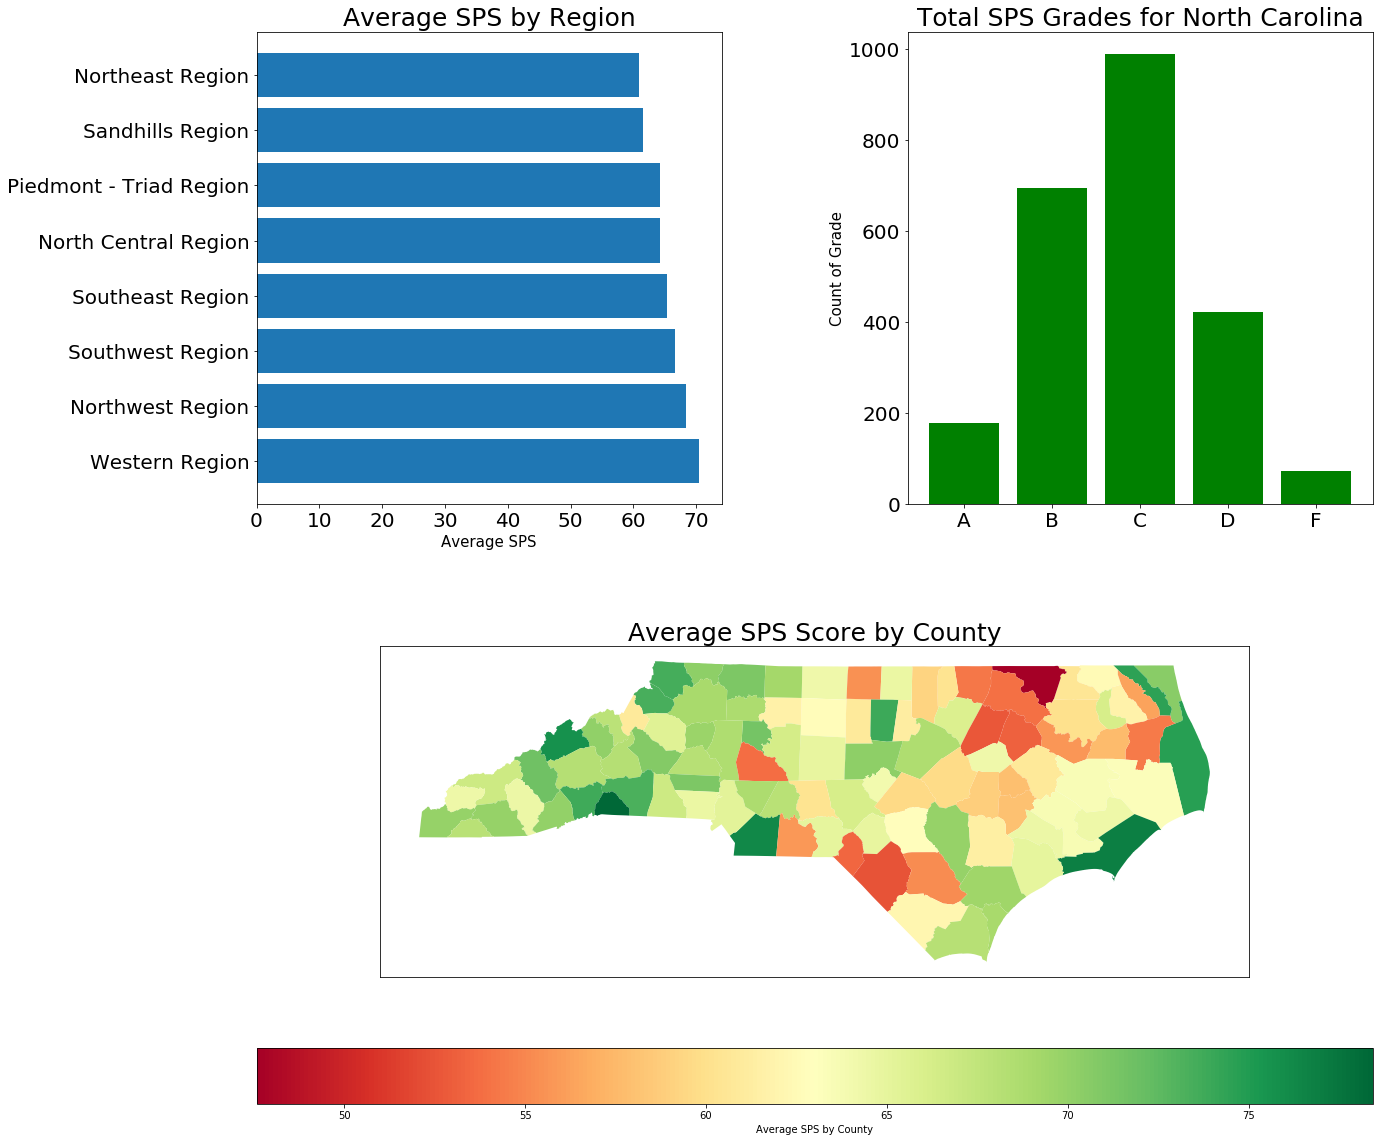

In [25]:
fig = plt.figure(figsize=(20, 20))
grid = plt.GridSpec(2, 2, wspace=0.4, hspace=0.3)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[0, 1])
ax3 = fig.add_subplot(grid[1, :2])
ax1.barh(sps_data['Region'],sps_data['School Performance Score (SPS)'])
ax1.set_title('Average SPS by Region', fontsize = 25)
ax1.set_xlabel('Average SPS', fontsize = 15)
plt.setp(ax1.get_xticklabels(), fontsize=20)
plt.setp(ax1.get_yticklabels(), fontsize=20)
ax2.bar(letter_data,grade_count, color = 'g')
ax2.set_title('Total SPS Grades for North Carolina', fontsize = 25)
ax2.set_ylabel('Count of Grade', fontsize = 15)
plt.setp(ax2.get_xticklabels(), fontsize=20)
plt.setp(ax2.get_yticklabels(), fontsize=20)
nc_counties.plot(column='School Performance Score (SPS)', cmap='RdYlGn', ax=ax3, legend=True, 
                 legend_kwds={'label': "Average SPS by County", 'orientation': "horizontal"})
ax3.set_yticklabels([])
ax3.set_xticklabels([])
ax3.set_yticks([])
ax3.set_xticks([])
ax3.set_title('Average SPS Score by County', fontsize = 25)

Text(0.5, 1.0, 'Total North Carolina High School Grades')

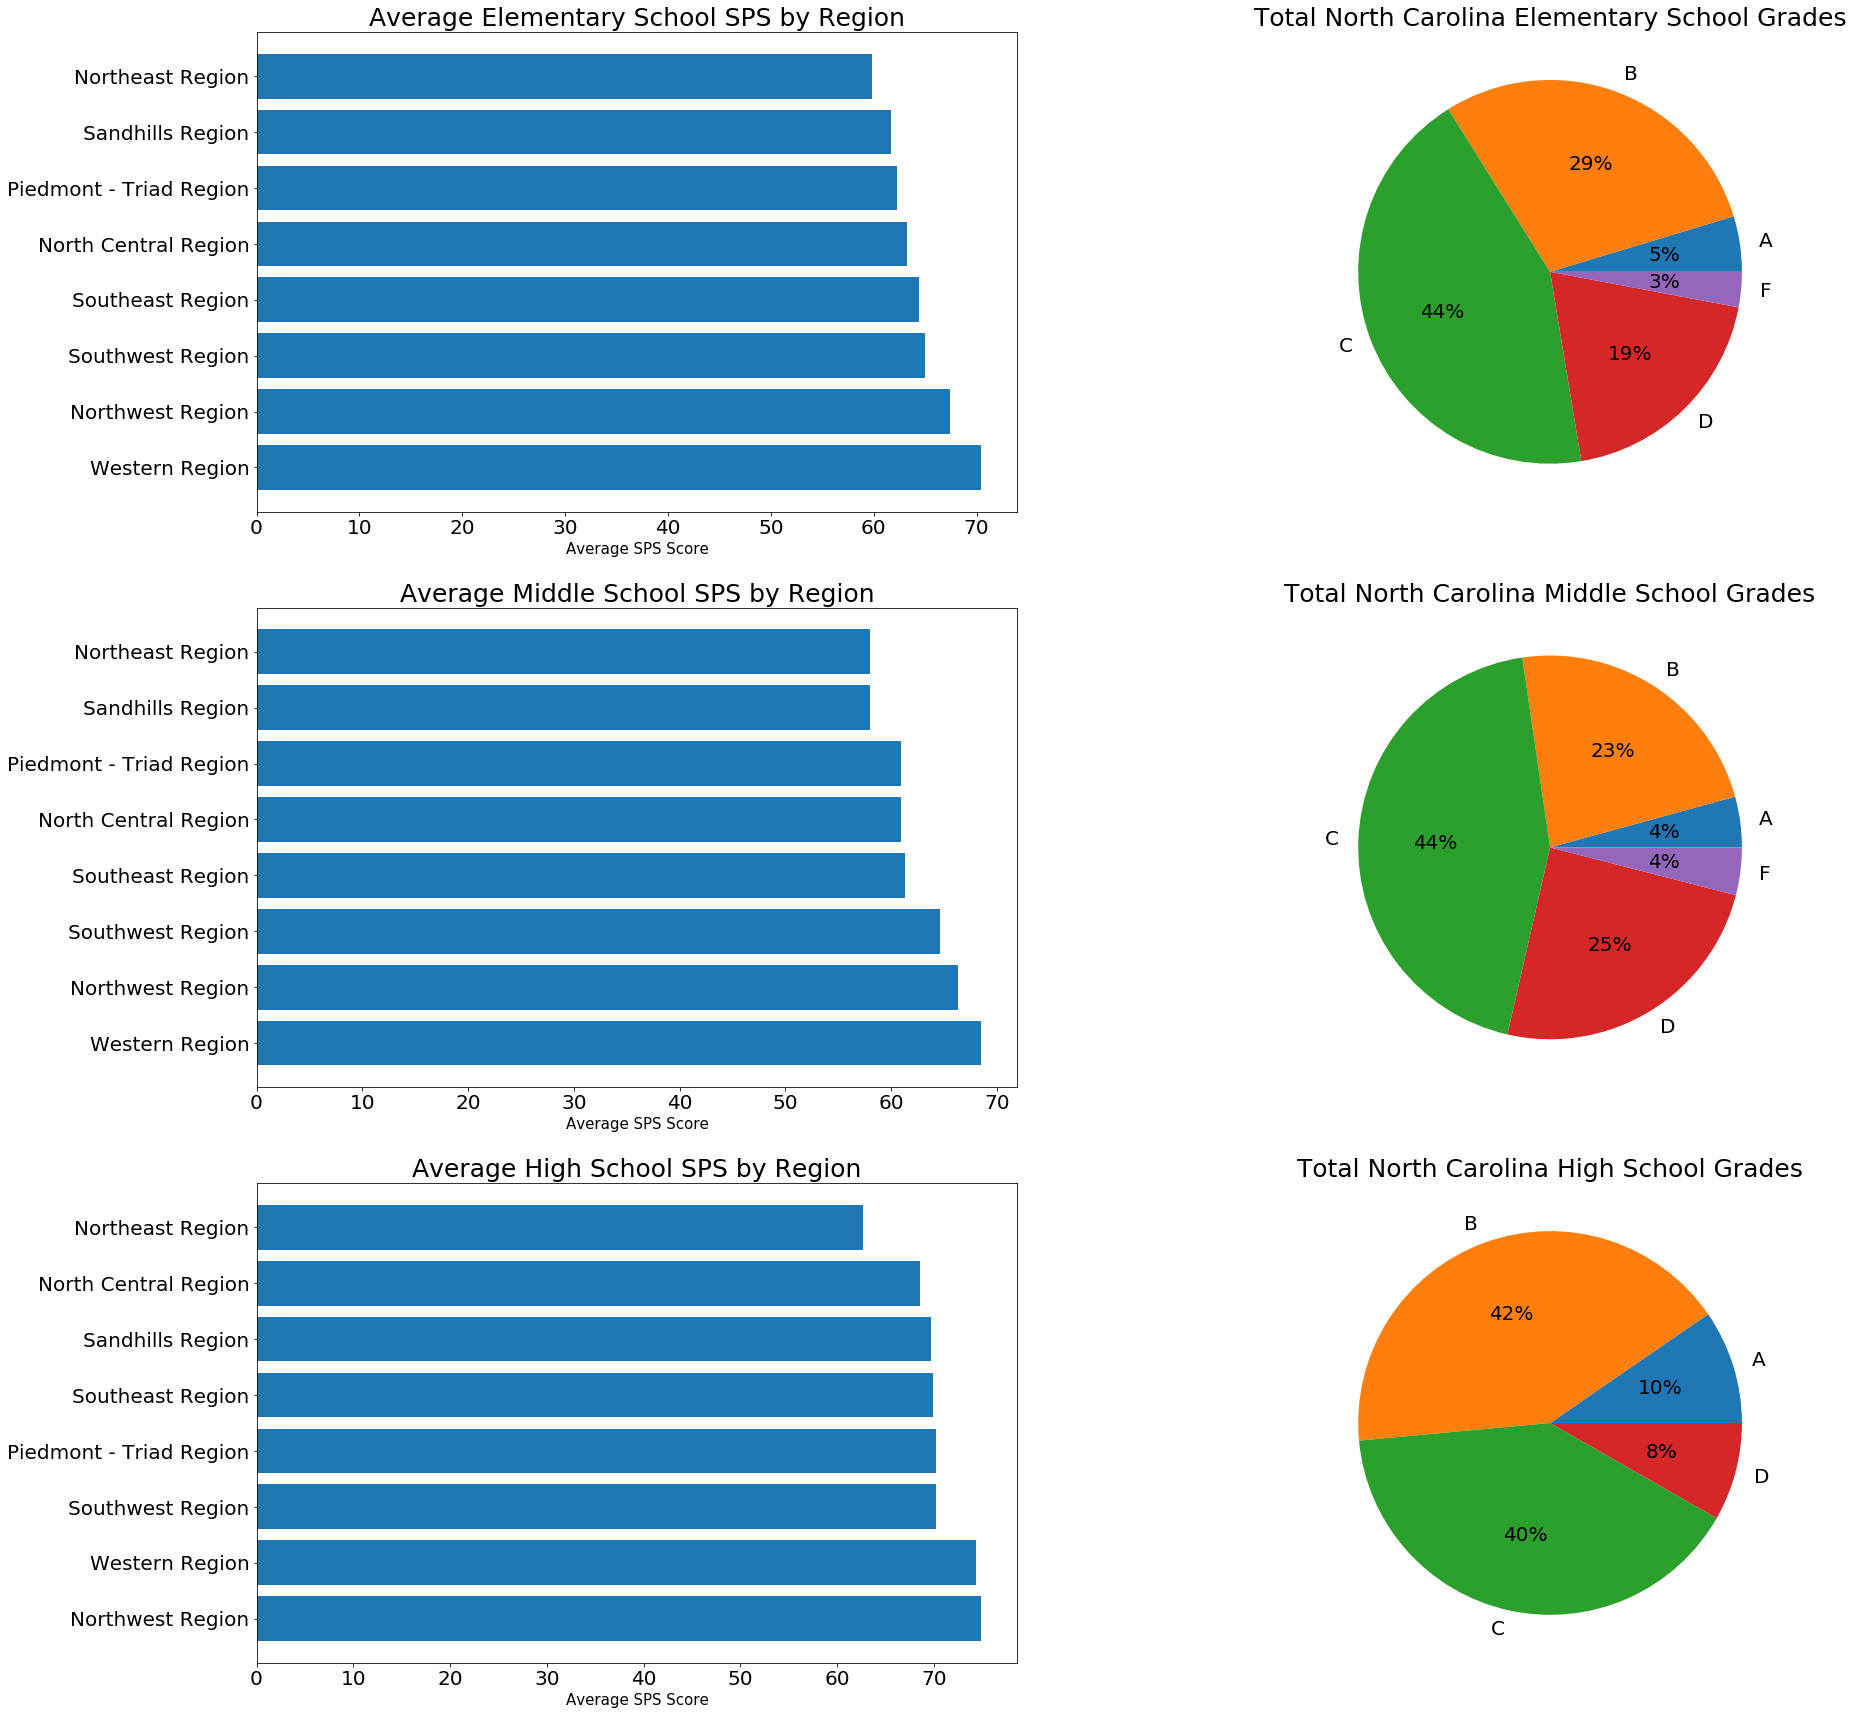

In [26]:
fig = plt.figure(figsize=(30, 30))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)
ax1.barh(elemen_data['Region'],elemen_data['School Performance Score (SPS)'])
ax1.set_title('Average Elementary School SPS by Region', fontsize = 25)
ax1.set_xlabel('Average SPS Score', fontsize = 15)
plt.setp(ax1.get_xticklabels(), fontsize=20)
plt.setp(ax1.get_yticklabels(), fontsize=20)
ax2.pie(elem_grade_count, labels=letter_data, autopct='%1.0f%%',textprops={'fontsize': 20})
ax2.set_title('Total North Carolina Elementary School Grades', fontsize = 25)
ax3.barh(middle_data['Region'],middle_data['School Performance Score (SPS)'])
ax3.set_title('Average Middle School SPS by Region', fontsize = 25)
ax3.set_xlabel('Average SPS Score', fontsize = 15)
plt.setp(ax3.get_xticklabels(), fontsize=20)
plt.setp(ax3.get_yticklabels(), fontsize=20)
ax4.pie(middle_grade_count, labels=letter_data, autopct='%1.0f%%',textprops={'fontsize': 20})
ax4.set_title('Total North Carolina Middle School Grades', fontsize = 25)
ax5.barh(high_data['Region'],high_data['School Performance Score (SPS)'])
ax5.set_title('Average High School SPS by Region', fontsize = 25)
ax5.set_xlabel('Average SPS Score', fontsize = 15)
plt.setp(ax5.get_xticklabels(), fontsize=20)
plt.setp(ax5.get_yticklabels(), fontsize=20)
ax6.pie(high_grade_count, labels=high_letter_data, autopct='%1.0f%%',textprops={'fontsize': 20})
ax6.set_title('Total North Carolina High School Grades', fontsize = 25)